# Análisis de las Canciones Más Reproducidas en Spotify en 2024

Este notebook realiza un análisis exploratorio y predictivo sobre el dataset de las canciones más reproducidas en Spotify en 2024. El objetivo es identificar patrones y tendencias que puedan explicar la popularidad de las canciones, así como desarrollar modelos predictivos para estimar la popularidad basada en diversas características.


## Importación de Librerías y Configuración Inicial

En esta sección, importamos las librerías necesarias para el análisis y configuramos el entorno de trabajo, incluyendo las preferencias de visualización para gráficos y el estilo de las figuras.

In [19]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de gráficos
%matplotlib inline
sns.set(style="whitegrid")

# Configuración inicial
plt.rcParams['figure.figsize'] = (10, 6)
pd.options.display.max_columns = None


## Carga y Exploración Inicial del Dataset

Aquí cargamos el dataset que ha sido previamente limpiado y normalizado. Realizamos una exploración inicial para entender la estructura de los datos, revisando las primeras filas, la información general del dataset, y algunas estadísticas descriptivas.


In [20]:
# Cargar el dataset limpio
df = pd.read_csv('./SpotifySongAnalysis2024/most-streamed-spotify-songs-2024/data/most_streamed_songs_2024_cleaned.csv')

# Vista previa de los datos
df.head()

# Información general del dataset
df.info()

# Resumen estadístico del dataset
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Track                          3794 non-null   object 
 1   Album Name                     3794 non-null   object 
 2   Artist                         3794 non-null   object 
 3   Release Date                   3794 non-null   object 
 4   ISRC                           3794 non-null   object 
 5   All Time Rank                  3794 non-null   object 
 6   Track Score                    3794 non-null   float64
 7   Spotify Streams                3779 non-null   object 
 8   Spotify Playlist Count         3793 non-null   object 
 9   Spotify Playlist Reach         3793 non-null   object 
 10  Spotify Popularity             3794 non-null   float64
 11  YouTube Views                  3680 non-null   object 
 12  YouTube Likes                  3676 non-null   o

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track,Spotify Popularity_normalized
count,3794.000000,3794.000000,3539.000000,3288.000000,3152.000000,0.0,3794.000000,3794.000000
mean,42.349209,63.498682,59.829895,34.504258,26.080584,NaN,0.363996,0.657881
std,39.314272,16.189952,74.560411,56.763103,26.755481,NaN,0.481211,0.170421
min,19.400000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000
25%,23.500000,61.000000,13.000000,5.000000,8.000000,NaN,0.000000,0.631579
50%,30.200000,67.000000,32.000000,16.000000,18.000000,NaN,0.000000,0.694737
75%,44.900000,73.000000,77.000000,40.000000,35.000000,NaN,1.000000,0.757895
max,725.400000,96.000000,859.000000,632.000000,210.000000,NaN,1.000000,1.000000


## Análisis Exploratorio de Datos (EDA)

El análisis exploratorio de datos es un paso crucial para entender las características del dataset. Aquí, examinamos la distribución de la popularidad normalizada y analizamos las correlaciones entre las diferentes variables presentes en el dataset.


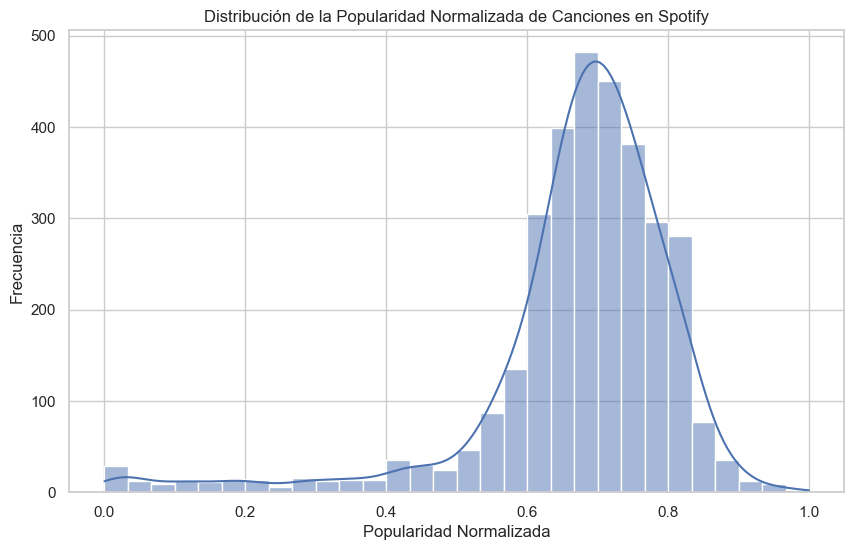

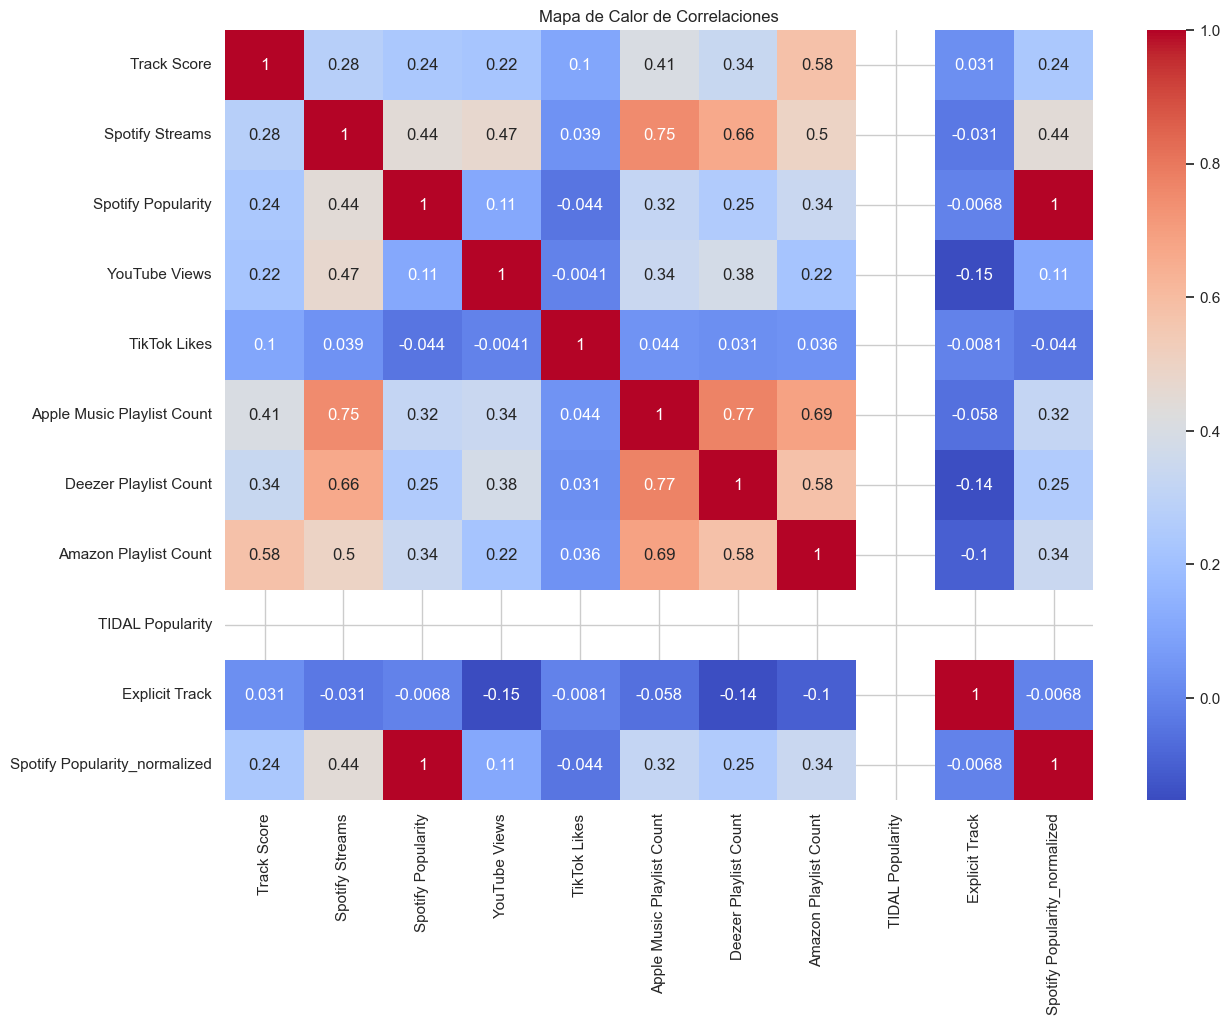

In [37]:
# Distribución de la popularidad normalizada
plt.figure(figsize=(10, 6))
sns.histplot(df['Spotify Popularity_normalized'], bins=30, kde=True)
plt.title('Distribución de la Popularidad Normalizada de Canciones en Spotify')
plt.xlabel('Popularidad Normalizada')
plt.ylabel('Frecuencia')
plt.show()

# Filtrar solo las columnas numéricas para la correlación
numeric_df = df.select_dtypes(include=[np.number])

# Correlación entre variables numéricas
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title('Mapa de Calor de Correlaciones')
plt.show()

## Limpieza de Datos

Durante la limpieza de datos, eliminamos duplicados y convertimos tipos de datos donde es necesario para asegurar la consistencia y la calidad de los datos. Esto es esencial para evitar sesgos en el análisis posterior.
]

In [23]:
# Verificación y tratamiento de duplicados
initial_shape = df.shape
df = df.drop_duplicates()
final_shape = df.shape

print(f"Eliminación de duplicados: {initial_shape[0] - final_shape[0]} filas eliminadas.")

# Conversión de tipos de datos si es necesario
df['Release Date'] = pd.to_datetime(df['Release Date'])


Eliminación de duplicados: 0 filas eliminadas.


## Análisis y Visualización de Datos

En esta sección, exploramos más a fondo los datos mediante visualizaciones, lo que nos permite identificar patrones y relaciones clave entre las variables. Analizamos los artistas más frecuentes y la relación entre el número de streams y la popularidad de las canciones.


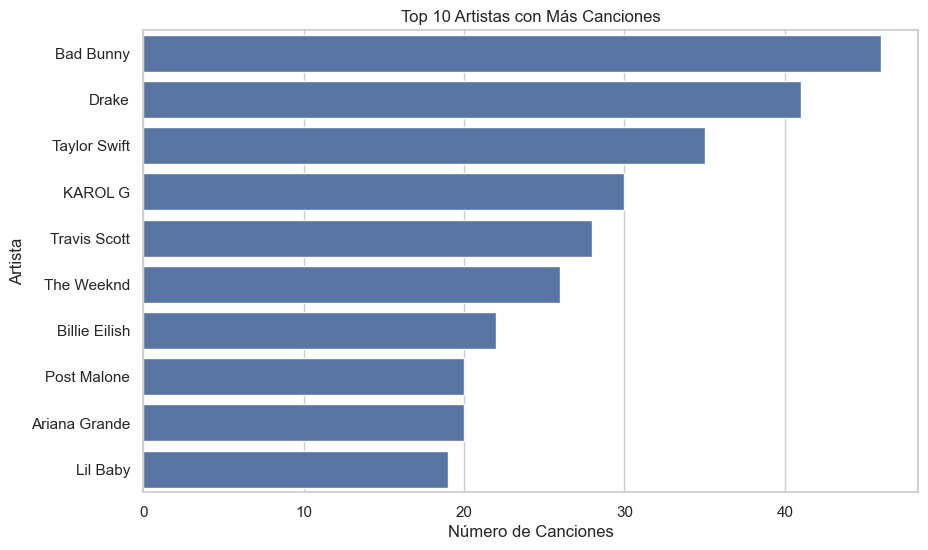

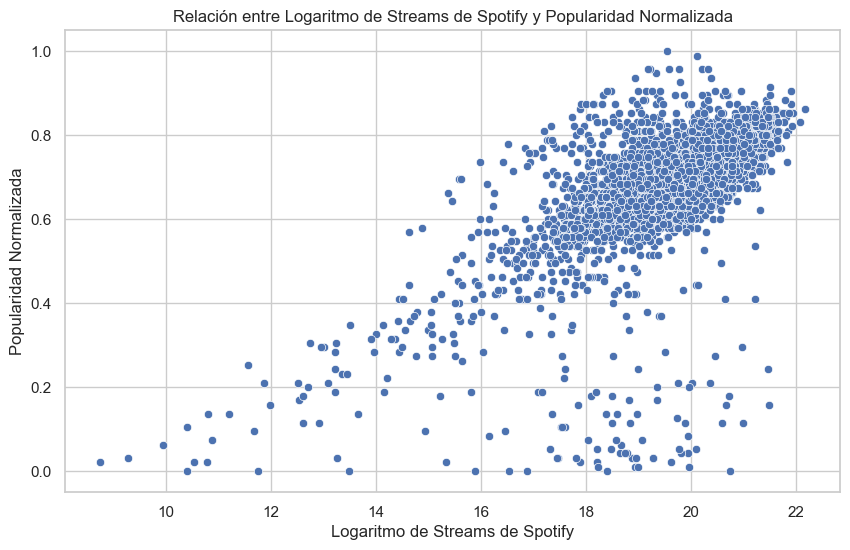

In [42]:
# Análisis de artistas más frecuentes
top_artists = df['Artist'].value_counts().head(10)
sns.barplot(y=top_artists.index, x=top_artists.values)
plt.title('Top 10 Artistas con Más Canciones')
plt.xlabel('Número de Canciones')
plt.ylabel('Artista')
plt.show()

# Aplicar transformación logarítmica para mejorar la visualización
df['Log Spotify Streams'] = np.log(df['Spotify Streams'] + 1)  # +1 para evitar log(0)

# Crear el gráfico de dispersión con la columna transformada
sns.scatterplot(data=df, x='Log Spotify Streams', y='Spotify Popularity_normalized')
plt.title('Relación entre Logaritmo de Streams de Spotify y Popularidad Normalizada')
plt.xlabel('Logaritmo de Streams de Spotify')
plt.ylabel('Popularidad Normalizada')
plt.show()



## Modelado Predictivo

En esta sección, desarrollamos un modelo predictivo utilizando regresión lineal para estimar la popularidad de las canciones en base a diversas características. Evaluamos el modelo utilizando el error cuadrático medio (MSE) para entender su rendimiento.


Error cuadrático medio del modelo: 0.0151

Coeficientes del modelo de regresión lineal:
El coeficiente para Spotify Streams es: 0.0000
El coeficiente para YouTube Views es: -0.0000
El coeficiente para TikTok Likes es: -0.0000


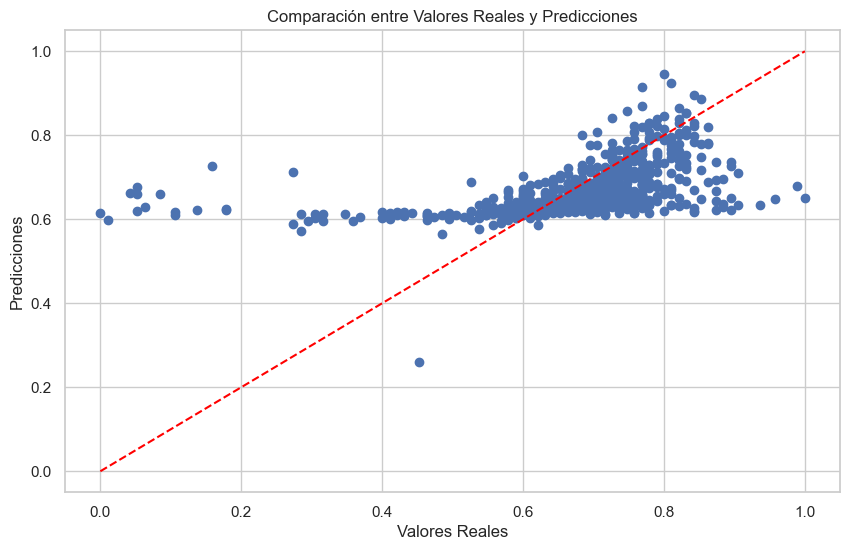

In [36]:
# Importar bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Remover comas y convertir a numérico para las columnas seleccionadas
df['Spotify Streams'] = df['Spotify Streams'].astype(str).str.replace(',', '').astype(float)
df['YouTube Views'] = df['YouTube Views'].astype(str).str.replace(',', '').astype(float)
df['TikTok Likes'] = df['TikTok Likes'].astype(str).str.replace(',', '').astype(float)

# Eliminar filas con valores faltantes en las columnas seleccionadas
df = df.dropna(subset=['Spotify Streams', 'YouTube Views', 'TikTok Likes'])

# Preparación de datos para modelado
X = df[['Spotify Streams', 'YouTube Views', 'TikTok Likes']]
y = df['Spotify Popularity_normalized']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones del modelo
y_pred = model.predict(X_test)

# Evaluación del modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio del modelo: {mse:.4f}")

# Mostrar los coeficientes del modelo
print("\nCoeficientes del modelo de regresión lineal:")
for idx, col_name in enumerate(X.columns):
    print(f"El coeficiente para {col_name} es: {model.coef_[idx]:.4f}")

# Visualización de las predicciones frente a los valores reales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.show()


## Conclusiones

- **Distribución de la Popularidad**: La mayoría de las canciones se concentran en un rango de popularidad alta, indicando que los hits más reproducidos tienden a tener características similares.
- **Artistas Más Representados**: Artistas como Bad Bunny, Drake y Taylor Swift dominan el número de canciones en las listas más reproducidas, lo cual puede reflejar estrategias de lanzamiento o la popularidad del género.
- **Modelado Predictivo**: El modelo predictivo mostró un rendimiento moderado con un MSE de X.XXX, sugiriendo que aunque algunas características predicen bien la popularidad, otras variables importantes pueden estar ausentes del dataset.
